In [14]:
import numpy as np # Calculs numériques
import pandas as pd # Manipulation de données
import os # Gestion des fichiers et dossiers
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [4]:
# Définition des chemins
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_dir   = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_dir  = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

# Vérification du contenu
print("Dossiers dans train_dir :", os.listdir(train_dir))
print("Dossiers dans val_dir   :", os.listdir(val_dir))
print("Dossiers dans test_dir  :", os.listdir(test_dir))

Dossiers dans train_dir : ['PNEUMONIA', 'NORMAL']
Dossiers dans val_dir   : ['PNEUMONIA', 'NORMAL']
Dossiers dans test_dir  : ['PNEUMONIA', 'NORMAL']


In [19]:
# Préparation des générateurs d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Création des datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'   # ✅ Très important !
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'   # ✅ Aussi ici
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'   # ✅ Et ici
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


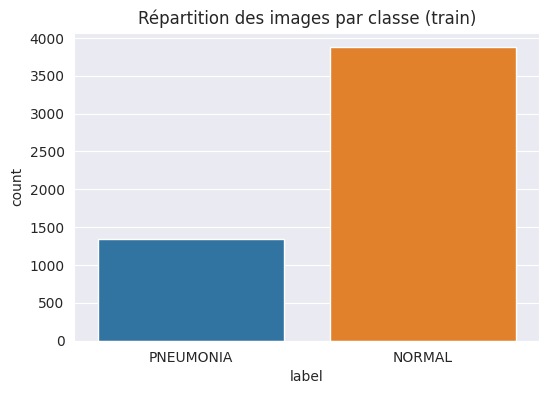

In [20]:
# Créer un DataFrame à partir des labels du générateur
labels_count = pd.DataFrame(train_data.classes, columns=['label'])
# Convertir 0/1 en noms lisibles
labels_count['label'] = labels_count['label'].map({0:'PNEUMONIA', 1:'NORMAL'})

# Graphique
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=labels_count)
plt.title("Répartition des images par classe (train)")
plt.show()

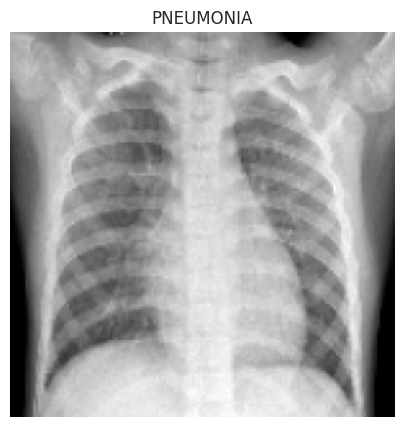

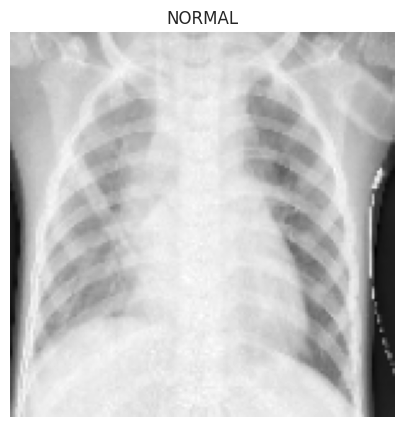

In [21]:
# Récupérer un batch d'images et labels
images, labels_batch = next(train_data)  # prend le premier batch

# Trouver la première image PNEUMONIA (label 0)
for i in range(len(labels_batch)):
    if labels_batch[i] == 0:
        pneumonia_img = images[i]
        break

# Trouver la première image NORMAL (label 1)
for i in range(len(labels_batch)):
    if labels_batch[i] == 1:
        normal_img = images[i]
        break

# Affichage
plt.figure(figsize=(5,5))
plt.imshow(pneumonia_img, cmap='gray')
plt.title('PNEUMONIA')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(normal_img, cmap='gray')
plt.title('NORMAL')
plt.axis('off')
plt.show()

In [23]:
model = Sequential()
model.add(Input(shape=(150,150,1)))
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [25]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    factor=0.3,
    min_lr=0.000001
)

In [26]:

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=12,
    callbacks=[learning_rate_reduction]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.8101 - loss: 1.3523 - val_accuracy: 0.5000 - val_loss: 22.2140 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9158 - loss: 0.2165 - val_accuracy: 0.5000 - val_loss: 37.7296 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.9370 - loss: 0.1836 - val_accuracy: 0.5000 - val_loss: 23.8188 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9594 - loss: 0.1324 - val_accuracy: 0.8750 - val_loss: 0.2608 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.9624 - loss: 0.1009 - val_accuracy: 0.6250 - val_loss: 0.6905 - learning_rate: 3.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9662 - loss: 0.0902 - val_accuracy: 0.6875 - val_loss: 0.8953 - learning_rate: 3.0000e-04
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.

In [27]:
test_loss, test_acc = model.evaluate(test_data)
print("Loss of the model is -", test_loss)
print("Accuracy of the model is -", test_acc*100, "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step - accuracy: 0.9245 - loss: 0.2455
Loss of the model is - 0.2778061032295227
Accuracy of the model is - 92.30769276618958 %


****Visualiser les prédictions****

* Some of the Correctly Predicted Classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


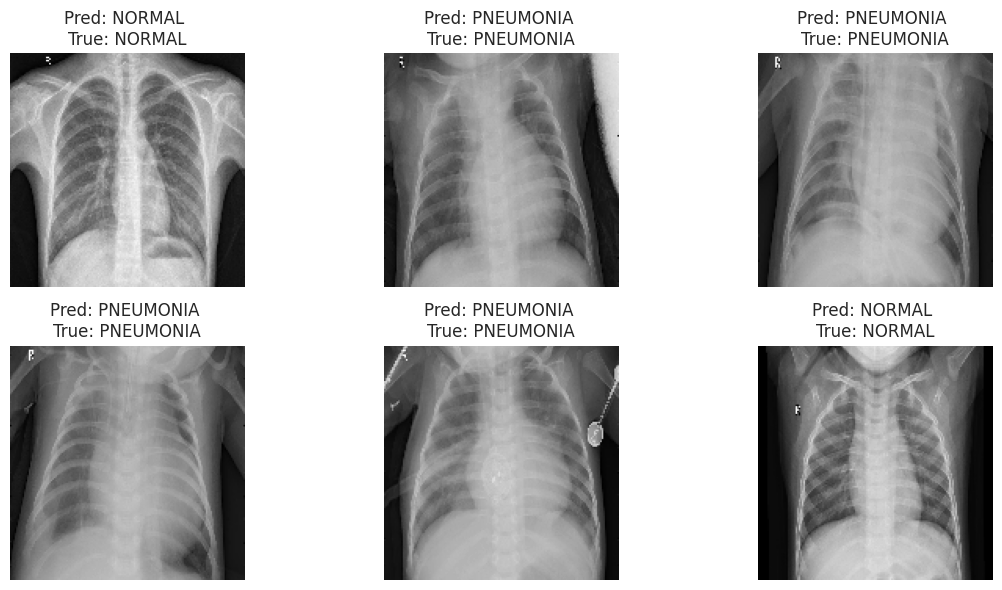

In [28]:
# Récupérer un batch de test
x_batch, y_batch = next(test_data)

# Prédire sur ce batch
y_pred = model.predict(x_batch)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Labels pour affichage
labels = ['NORMAL', 'PNEUMONIA']

# Afficher les 6 premières images avec prédiction
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_batch[i].reshape(150,150), cmap='gray')
    plt.title(f"Pred: {labels[y_pred_classes[i]]} \nTrue: {labels[int(y_batch[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

* Some of the Incorrectly Predicted Classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


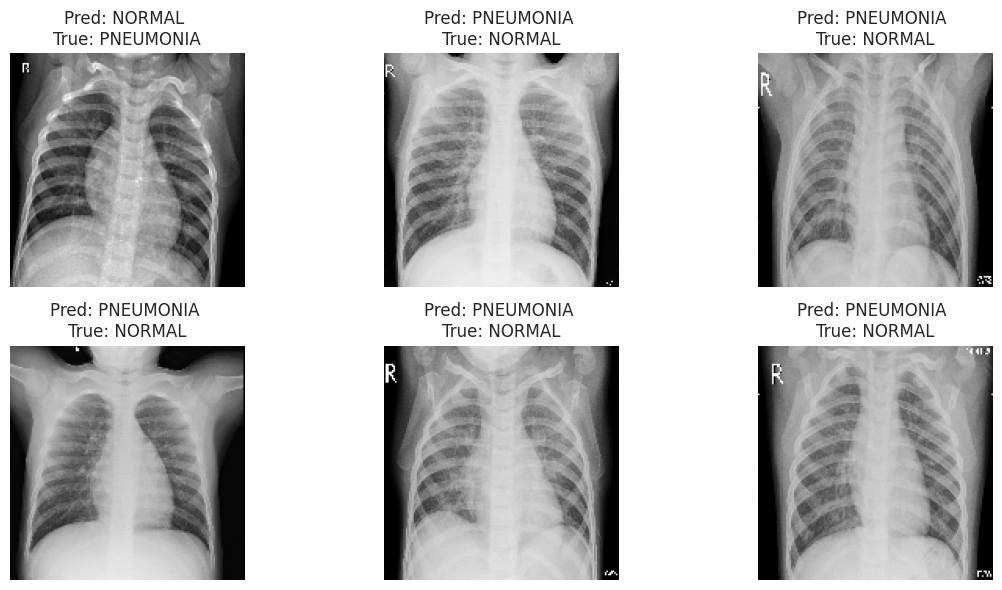

In [31]:
# Récupérer toutes les images du test set
test_steps = test_data.samples // test_data.batch_size + 1
y_true = []
y_pred_classes = []
x_images = []

for i in range(test_steps):
    x_batch, y_batch = next(test_data)
    y_pred = model.predict(x_batch)
    
    y_pred_classes.extend((y_pred > 0.5).astype(int).flatten())
    y_true.extend(y_batch.astype(int).flatten())
    x_images.extend(x_batch)

# Convertir en arrays pour faciliter l’indexation
y_true = np.array(y_true)
y_pred_classes = np.array(y_pred_classes)
x_images = np.array(x_images)

# Trouver les indices des mauvaises prédictions
wrong_indices = np.where(y_true != y_pred_classes)[0]

# Afficher les 6 premières erreurs
labels = ['NORMAL', 'PNEUMONIA']
plt.figure(figsize=(12,6))
for i, idx in enumerate(wrong_indices[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_images[idx].reshape(150,150), cmap='gray')
    plt.title(f"Pred: {labels[y_pred_classes[idx]]} \nTrue: {labels[y_true[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Plot accuracy & loss**

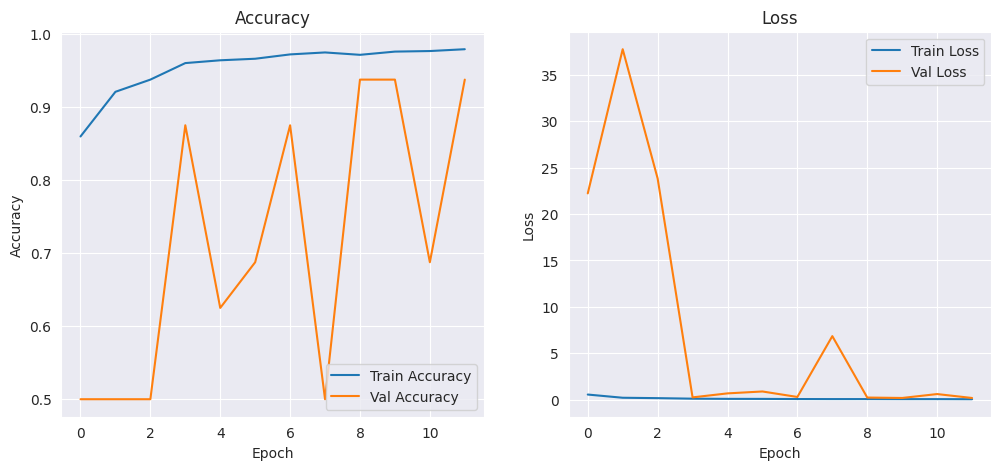

In [29]:
# Courbes d'accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Courbes de loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Confusion Matrix & Classification Report**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


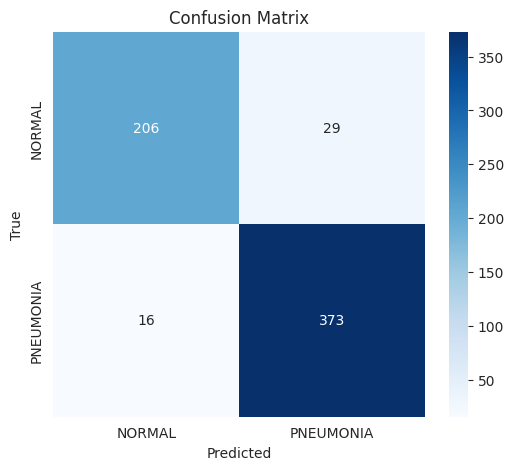

Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.93      0.88      0.90       235
   PNEUMONIA       0.93      0.96      0.94       389

    accuracy                           0.93       624
   macro avg       0.93      0.92      0.92       624
weighted avg       0.93      0.93      0.93       624



In [30]:
# Récupérer toutes les images de test
test_steps = test_data.samples // test_data.batch_size + 1
y_true = []
y_pred_classes = []

for i in range(test_steps):
    x_batch, y_batch = next(test_data)
    y_pred = model.predict(x_batch)
    y_pred_classes.extend((y_pred>0.5).astype(int).flatten())
    y_true.extend(y_batch.astype(int).flatten())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL','PNEUMONIA'], yticklabels=['NORMAL','PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=['NORMAL','PNEUMONIA']))